# (13) Sim -- behavior of ```filter()``` when ```dim=17```

**Motivation**: Study its behavior, choose appropriate ```accept_n```, ```min_obj_size```, etc. Finally, generate and save. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from figures.fighelper import *
from analysis.opticflow import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
# HIDE CODE


def _do_pca(a):
    a = flatten_arr(a, ndim_end=0, ndim_start=1)
    u, s, v = sp_lin.svd(a, full_matrices=False, compute_uv=True)
    s *= 100 / s.sum()
    titles = [f"{e:0.1f} %" for e in s]
    pcs = v.reshape(-1, of.dim, of.dim, 2)
    return s, pcs, titles


def _plot_singular_values(s, thres=90):
    fig, axes = create_figure(2, 1, (13, 7), sharex='all')
    axes[0].plot(s, marker='.')
    axes[1].plot(np.cumsum(s), lw=3, marker=None)

    idx = np.where(np.cumsum(s) > thres)[0][0]
    axes[1].axvline(
        idx, color='g', ls=':', lw=1.5,
        label=f'{idx} dimensions',
    )
    axes[1].axhline(
        thres, color='magenta', ls=':', lw=1.5,
        label=f'{thres}% of variance',
    )
    axes[1].legend()

    axes[1].axhline(0, color='k', ls='--', lw=1.2)
    axes[1].axhline(100, color='k', ls='--', lw=1.2)
    axes[1].set_ylim((-3, 103))
    add_grid(axes)
    plt.show()

    
def _sizes_hist(of, obj_i: int = 0):
    fig, ax = create_figure(1, 1, (15, 5))
    size_pix = of.objects[obj_i].size * of.dim ** 2
    sns.histplot(size_pix, bins=np.linspace(0, 80, 81) - 0.5, stat='percent', ax=ax)

    for color, thres in zip(['magenta', 'k', 'g', 'r'], [2, 4, 6, 8]):
        lbl = f'{100 * (size_pix < thres).sum() / of.n:0.1f}% smaller than {thres} pixels'
        ax.axvline(thres, color=color, ls='--', lw=1.3, label=lbl)
    ax.legend(fontsize=17)
    plt.show()

## Accept explore

In [3]:
from skimage.transform import resize

kws = dict(
    n=int(1e3),
    dim=17,
    fov=45.0,
    obj_r=0.25,
    obj_bound=0.97,
    obj_zlim=(0.5, 1.0),
    vlim_obj=(0.01, 1.0),
    vlim_slf=(0.01, 1.0),
    residual=False,
    z_bg=1.0,
    seed=0,
)
print(kws)

min_obj_size = 3.5

{
    'n': 1000,
    'dim': 17,
    'fov': 45.0,
    'obj_r': 0.25,
    'obj_bound': 0.97,
    'obj_zlim': (0.5, 1.0),
    'vlim_obj': (0.01, 1.0),
    'vlim_slf': (0.01, 1.0),
    'residual': False,
    'z_bg': 1.0,
    'seed': 0
}

In [4]:
from base.dataset import simulation_combos
combos = simulation_combos()
print(combos)

[
    ('fixate', 0),
    ('fixate', 1),
    ('fixate', 2),
    ('fixate', 4),
    ('fixate', 8),
    ('terrain', 1),
    ('terrain', 2),
    ('terrain', 4),
    ('terrain', 8),
    ('transl', 0),
    ('transl', 2),
    ('transl', 4),
    ('obj', 1),
    ('obj', 2),
    ('obj', 4),
    ('obj', 8)
]

In [5]:
for category, n_obj in combos:
    kws['category'] = category
    kws['n_obj'] = n_obj
    of = OpticFlow(**kws).compute_coords()
    _ = of.compute_flow()
    accept = of.filter(min_obj_size)
    
    msg = f"category: {category}, # objects = {n_obj}    ||    "
    msg += f"accepted: {100 * accept.sum() / len(accept):0.1f}"
    msg += f" %,  (min obj size = {min_obj_size})"
    print(msg)

category: fixate, # objects = 0    ||    accepted: 100.0 %,  (min obj size = 3.5)

category: fixate, # objects = 1    ||    accepted: 88.0 %,  (min obj size = 3.5)

category: fixate, # objects = 2    ||    accepted: 77.7 %,  (min obj size = 3.5)

category: fixate, # objects = 4    ||    accepted: 61.4 %,  (min obj size = 3.5)

category: fixate, # objects = 8    ||    accepted: 43.9 %,  (min obj size = 3.5)

category: terrain, # objects = 1    ||    accepted: 79.7 %,  (min obj size = 3.5)

category: terrain, # objects = 2    ||    accepted: 63.0 %,  (min obj size = 3.5)

category: terrain, # objects = 4    ||    accepted: 43.0 %,  (min obj size = 3.5)

category: terrain, # objects = 8    ||    accepted: 20.1 %,  (min obj size = 3.5)

category: transl, # objects = 0    ||    accepted: 100.0 %,  (min obj size = 3.5)

category: transl, # objects = 2    ||    accepted: 77.7 %,  (min obj size = 3.5)

category: transl, # objects = 4    ||    accepted: 61.4 %,  (min obj size = 3.5)

category: obj, # objects = 1    ||    accepted: 88.0 %,  (min obj size = 3.5)

category: obj, # objects = 2    ||    accepted: 77.7 %,  (min obj size = 3.5)

category: obj, # objects = 4    ||    accepted: 61.4 %,  (min obj size = 3.5)

category: obj, # objects = 8    ||    accepted: 43.9 %,  (min obj size = 3.5)

In [6]:
accept_n = {
    0: None,
    1: None,
    2: 1,
    4: 3,
    8: 5,
}
for category, n_obj in combos:
    kws['category'] = category
    kws['n_obj'] = n_obj
    of = OpticFlow(**kws).compute_coords()
    _ = of.compute_flow()

    min_n_obj = accept_n[n_obj]
    accept = of.filter(
        min_obj_size=min_obj_size,
        min_n_obj=min_n_obj,
    )

    msg = f"category: {category}, # objects = {n_obj}    ||    "
    msg += f"accepted: {100 * accept.sum() / len(accept):0.1f}"
    msg += f" %,  (min size = {min_obj_size}, min n = {min_n_obj})"
    print(msg)

category: fixate, # objects = 0    ||    accepted: 100.0 %,  (min size = 3.5, min n = None)

category: fixate, # objects = 1    ||    accepted: 88.0 %,  (min size = 3.5, min n = None)

category: fixate, # objects = 2    ||    accepted: 97.7 %,  (min size = 3.5, min n = 1)

category: fixate, # objects = 4    ||    accepted: 90.1 %,  (min size = 3.5, min n = 3)

category: fixate, # objects = 8    ||    accepted: 97.1 %,  (min size = 3.5, min n = 5)

category: terrain, # objects = 1    ||    accepted: 79.7 %,  (min size = 3.5, min n = None)

category: terrain, # objects = 2    ||    accepted: 96.6 %,  (min size = 3.5, min n = 1)

category: terrain, # objects = 4    ||    accepted: 81.8 %,  (min size = 3.5, min n = 3)

category: terrain, # objects = 8    ||    accepted: 92.7 %,  (min size = 3.5, min n = 5)

category: transl, # objects = 0    ||    accepted: 100.0 %,  (min size = 3.5, min n = None)

category: transl, # objects = 2    ||    accepted: 97.7 %,  (min size = 3.5, min n = 1)

category: transl, # objects = 4    ||    accepted: 90.1 %,  (min size = 3.5, min n = 3)

category: obj, # objects = 1    ||    accepted: 88.0 %,  (min size = 3.5, min n = None)

category: obj, # objects = 2    ||    accepted: 97.7 %,  (min size = 3.5, min n = 1)

category: obj, # objects = 4    ||    accepted: 90.1 %,  (min size = 3.5, min n = 3)

category: obj, # objects = 8    ||    accepted: 97.1 %,  (min size = 3.5, min n = 5)

## category = ```terrain```, n_obj=16

In [10]:
kws['category'] = 'terrain'
kws['n_obj'] = 16
of = OpticFlow(**kws).compute_coords()
_ = of.compute_flow()

In [11]:
min_obj_size = 3.5

accepted = [
    obj.size > min_obj_size / of.dim**2
    for obj in of.objects.values()
]
num_present = np.stack(accepted).sum(0)

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5])

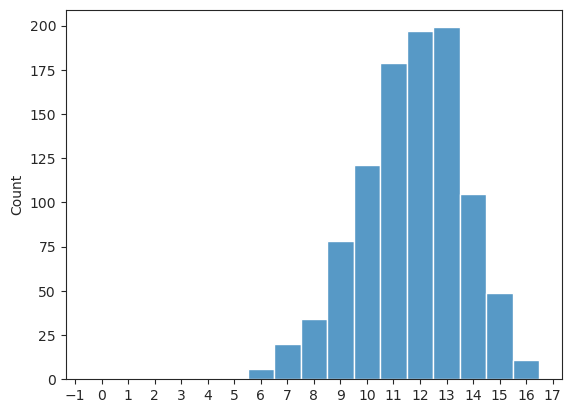

In [20]:
ax = sns.histplot(num_present, bins=np.linspace(0, 17, 18) - 0.5)
ax.locator_params(axis='x', nbins=23);

In [22]:
for min_n in [16, 15, 14, 13, 12, 11, 10, 9]:
    print(f"min n = {min_n},\taccepted: {100 * (num_present >= min_n).sum() / of.n:0.1f} %")

min n = 16,     accepted: 1.1 %

min n = 15,     accepted: 6.0 %

min n = 14,     accepted: 16.5 %

min n = 13,     accepted: 36.4 %

min n = 12,     accepted: 56.1 %

min n = 11,     accepted: 74.0 %

min n = 10,     accepted: 86.1 %

min n = 9,      accepted: 93.9 %

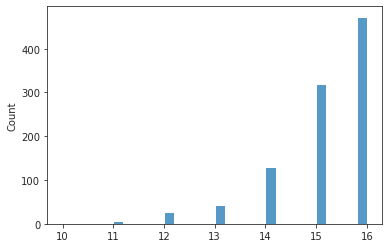

min n = 16,     accepted: 47.3 %

min n = 15,     accepted: 79.2 %

min n = 14,     accepted: 92.1 %

min n = 13,     accepted: 96.4 %

## Print generative factors

- After fixing the bug in terrain

In [7]:
kws['n'] = 100
for category, n_obj in combos:
    kws['category'] = category
    kws['n_obj'] = n_obj
    of = OpticFlow(**kws).compute_coords()
    _ = of.compute_flow()
    f, g, f_aux, g_aux = of.groundtruth_factors()
    f_with_mu_sig = {}
    for k, v in zip(f, g.T):
        mu, sd = np.mean(v), np.std(v)
        if sd < 1e-3:
            raise RuntimeError
        f_with_mu_sig[k] = (np.round(mu, 3), np.round(sd, 3))
    f_aux_with_mu_sig = {}
    for k, v in zip(f_aux, g_aux.T):
        mu, sd = np.mean(v), np.std(v)
        if sd < 1e-3:
            raise RuntimeError
        f_aux_with_mu_sig[k] = (np.round(mu, 3), np.round(sd, 3))
    print('-' * 80, f"\ncategory: {category}, n_obj = {n_obj}")
    print(f"factors:\n{f_with_mu_sig}")
    print(f"factors_aux:\n{f_aux_with_mu_sig}\n", '~' * 80)
    print('\n\n')

-------------------------------------------------------------------------------- 
category: fixate, n_obj = 0

factors:
{'fix_x': (0.06, 0.403), 'fix_y': (0.003, 0.434), 'slf_v_norm': (0.529, 0.252), 
'slf_v_theta': (1.57, 0.744), 'slf_v_phi': (3.046, 1.674)}

factors_aux:
{'slf_v_x': (-0.061, 0.29), 'slf_v_y': (0.012, 0.348), 'slf_v_z': (0.015, 0.367)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-------------------------------------------------------------------------------- 
category: fixate, n_obj = 1

factors:
{'fix_x': (0.06, 0.403), 'fix_y': (0.003, 0.434), 'slf_v_norm': (0.529, 0.252), 
'slf_v_theta': (1.57, 0.744), 'slf_v_phi': (3.046, 1.674), 'obj0_alpha_x': (0.054, 0.402), 
'obj0_alpha_y': (0.043, 0.399), 'obj0_distance': (1.127, 0.58), 'obj0_v_norm': (0.489, 
0.276), 'obj0_v_theta': (1.649, 0.769), 'obj0_v_phi': (2.944, 1.847)}

factors_aux:
{'slf_v_x': (-0.061, 0.29), 'slf_v_y': (0.012, 0.348), 'slf_v_z': (0.015, 0.367), 
'obj0_size_eff': (0.075, 0.053), 'obj0_size': (0.075, 0.053), 'obj0_theta': (0.51, 0.198), 
'obj0_phi': (2.948, 1.901), 'obj0_x': (0.131, 0.638), 'obj0_y': (0.021, 0.785), 'obj0_z': 
(0.739, 0.141), 'obj0_dx': (0.071, 0.534), 'obj0_dy': (0.018, 0.611), 'obj0_dz': (-0.261, 
0.141), 'obj0_v_x': (-0.011, 0.318), 'obj0_v_y': (0.075, 0.292), 'obj0_v_z': (-0.019, 0.35), 
'obj0_dv_x': (0.05, 0.457), 'obj0_dv_y': (0.063, 0.456), 'obj0_dv_z': (-0.034, 0.503), 
'obj0_dv_norm': (0.759, 0.32), 'obj0_dv_theta': (1.618, 0.704), 'obj0_dv_phi': (2.959, 
1.984)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-------------------------------------------------------------------------------- 
category: fixate, n_obj = 2

factors:
{'fix_x': (0.06, 0.403), 'fix_y': (0.003, 0.434), 'slf_v_norm': (0.529, 0.252), 
'slf_v_theta': (1.57, 0.744), 'slf_v_phi': (3.046, 1.674), 'obj0_alpha_x': (0.054, 0.402), 
'obj0_alpha_y': (0.043, 0.399), 'obj0_distance': (1.127, 0.58), 'obj0_v_norm': (0.489, 
0.276), 'obj0_v_theta': (1.649, 0.769), 'obj0_v_phi': (2.944, 1.847), 'obj1_alpha_x': (0.07, 
0.44), 'obj1_alpha_y': (-0.024, 0.448), 'obj1_distance': (1.211, 0.613), 'obj1_v_norm': 
(0.498, 0.293), 'obj1_v_theta': (1.603, 0.731), 'obj1_v_phi': (3.196, 1.748)}

factors_aux:
{'slf_v_x': (-0.061, 0.29), 'slf_v_y': (0.012, 0.348), 'slf_v_z': (0.015, 0.367), 
'obj0_size_eff': (0.072, 0.052), 'obj0_size': (0.075, 0.053), 'obj0_theta': (0.51, 0.198), 
'obj0_phi': (2.948, 1.901), 'obj0_x': (0.131, 0.638), 'obj0_y': (0.021, 0.785), 'obj0_z': 
(0.739, 0.141), 'obj0_dx': (0.071, 0.534), 'obj0_dy': (0.018, 0.611), 'obj0_dz': (-0.261, 
0.141), 'obj0_v_x': (-0.011, 0.318), 'obj0_v_y': (0.075, 0.292), 'obj0_v_z': (-0.019, 0.35), 
'obj0_dv_x': (0.05, 0.457), 'obj0_dv_y': (0.063, 0.456), 'obj0_dv_z': (-0.034, 0.503), 
'obj0_dv_norm': (0.759, 0.32), 'obj0_dv_theta': (1.618, 0.704), 'obj0_dv_phi': (2.959, 
1.984), 'obj1_size_eff': (0.061, 0.047), 'obj1_size': (0.064, 0.047), 'obj1_theta': (0.574, 
0.184), 'obj1_phi': (3.038, 1.914), 'obj1_x': (0.171, 0.814), 'obj1_y': (-0.06, 0.747), 
'obj1_z': (0.753, 0.146), 'obj1_dx': (0.11, 0.643), 'obj1_dy': (-0.063, 0.609), 'obj1_dz': 
(-0.247, 0.146), 'obj1_v_x': (-0.044, 0.358), 'obj1_v_y': (-0.019, 0.281), 'obj1_v_z': 
(-0.025, 0.351), 'obj1_dv_x': (0.017, 0.44), 'obj1_dv_y': (-0.031, 0.482), 'obj1_dv_z': 
(-0.04, 0.546), 'obj1_dv_norm': (0.772, 0.362), 'obj1_dv_theta': (1.649, 0.768), 
'obj1_dv_phi': (3.275, 1.849)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-------------------------------------------------------------------------------- 
category: fixate, n_obj = 4

factors:
{'fix_x': (0.06, 0.403), 'fix_y': (0.003, 0.434), 'slf_v_norm': (0.529, 0.252), 
'slf_v_theta': (1.57, 0.744), 'slf_v_phi': (3.046, 1.674), 'obj0_alpha_x': (0.054, 0.402), 
'obj0_alpha_y': (0.043, 0.399), 'obj0_distance': (1.127, 0.58), 'obj0_v_norm': (0.489, 
0.276), 'obj0_v_theta': (1.649, 0.769), 'obj0_v_phi': (2.944, 1.847), 'obj1_alpha_x': (0.07, 
0.44), 'obj1_alpha_y': (-0.024, 0.448), 'obj1_distance': (1.211, 0.613), 'obj1_v_norm': 
(0.498, 0.293), 'obj1_v_theta': (1.603, 0.731), 'obj1_v_phi': (3.196, 1.748), 'obj2_alpha_x':
(-0.003, 0.421), 'obj2_alpha_y': (-0.069, 0.411), 'obj2_distance': (1.114, 0.51), 
'obj2_v_norm': (0.493, 0.271), 'obj2_v_theta': (1.646, 0.659), 'obj2_v_phi': (3.243, 1.734), 
'obj3_alpha_x': (-0.017, 0.41), 'obj3_alpha_y': (-0.054, 0.379), 'obj3_distance': (1.113, 
0.497), 'obj3_v_norm': (0.55, 0.273), 'obj3_v_theta': (1.502, 0.696), 'obj3_v_phi': (2.957, 
1.793)}

factors_aux:
{'slf_v_x': (-0.061, 0.29), 'slf_v_y': (0.012, 0.348), 'slf_v_z': (0.015, 0.367), 
'obj0_size_eff': (0.064, 0.052), 'obj0_size': (0.075, 0.053), 'obj0_theta': (0.51, 0.198), 
'obj0_phi': (2.948, 1.901), 'obj0_x': (0.131, 0.638), 'obj0_y': (0.021, 0.785), 'obj0_z': 
(0.739, 0.141), 'obj0_dx': (0.071, 0.534), 'obj0_dy': (0.018, 0.611), 'obj0_dz': (-0.261, 
0.141), 'obj0_v_x': (-0.011, 0.318), 'obj0_v_y': (0.075, 0.292), 'obj0_v_z': (-0.019, 0.35), 
'obj0_dv_x': (0.05, 0.457), 'obj0_dv_y': (0.063, 0.456), 'obj0_dv_z': (-0.034, 0.503), 
'obj0_dv_norm': (0.759, 0.32), 'obj0_dv_theta': (1.618, 0.704), 'obj0_dv_phi': (2.959, 
1.984), 'obj1_size_eff': (0.058, 0.048), 'obj1_size': (0.064, 0.047), 'obj1_theta': (0.574, 
0.184), 'obj1_phi': (3.038, 1.914), 'obj1_x': (0.171, 0.814), 'obj1_y': (-0.06, 0.747), 
'obj1_z': (0.753, 0.146), 'obj1_dx': (0.11, 0.643), 'obj1_dy': (-0.063, 0.609), 'obj1_dz': 
(-0.247, 0.146), 'obj1_v_x': (-0.044, 0.358), 'obj1_v_y': (-0.019, 0.281), 'obj1_v_z': 
(-0.025, 0.351), 'obj1_dv_x': (0.017, 0.44), 'obj1_dv_y': (-0.031, 0.482), 'obj1_dv_z': 
(-0.04, 0.546), 'obj1_dv_norm': (0.772, 0.362), 'obj1_dv_theta': (1.649, 0.768), 
'obj1_dv_phi': (3.275, 1.849), 'obj2_size_eff': (0.059, 0.052), 'obj2_size': (0.075, 0.051), 
'obj2_theta': (0.533, 0.19), 'obj2_phi': (3.322, 1.832), 'obj2_x': (0.047, 0.641), 'obj2_y': 
(-0.11, 0.71), 'obj2_z': (0.744, 0.143), 'obj2_dx': (-0.013, 0.519), 'obj2_dy': (-0.114, 
0.56), 'obj2_dz': (-0.256, 0.143), 'obj2_v_x': (-0.014, 0.371), 'obj2_v_y': (0.005, 0.286), 
'obj2_v_z': (-0.02, 0.311), 'obj2_dv_x': (0.048, 0.467), 'obj2_dv_y': (-0.007, 0.482), 
'obj2_dv_z': (-0.036, 0.501), 'obj2_dv_norm': (0.771, 0.333), 'obj2_dv_theta': (1.642, 
0.703), 'obj2_dv_phi': (3.335, 1.848), 'obj3_size_eff': (0.06, 0.049), 'obj3_size': (0.073, 
0.049), 'obj3_theta': (0.507, 0.186), 'obj3_phi': (3.345, 1.833), 'obj3_x': (0.044, 0.603), 
'obj3_y': (-0.076, 0.723), 'obj3_z': (0.757, 0.14), 'obj3_dx': (-0.016, 0.505), 'obj3_dy': 
(-0.079, 0.531), 'obj3_dz': (-0.243, 0.14), 'obj3_v_x': (-0.006, 0.372), 'obj3_v_y': (0.037, 
0.336), 'obj3_v_z': (0.007, 0.351), 'obj3_dv_x': (0.055, 0.498), 'obj3_dv_y': (0.025, 0.494),
'obj3_dv_z': (-0.008, 0.489), 'obj3_dv_norm': (0.787, 0.339), 'obj3_dv_theta': (1.56, 0.676),
'obj3_dv_phi': (3.153, 1.86)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-------------------------------------------------------------------------------- 
category: fixate, n_obj = 8

factors:
{'fix_x': (0.06, 0.403), 'fix_y': (0.003, 0.434), 'slf_v_norm': (0.529, 0.252), 
'slf_v_theta': (1.57, 0.744), 'slf_v_phi': (3.046, 1.674), 'obj0_alpha_x': (0.054, 0.402), 
'obj0_alpha_y': (0.043, 0.399), 'obj0_distance': (1.127, 0.58), 'obj0_v_norm': (0.489, 
0.276), 'obj0_v_theta': (1.649, 0.769), 'obj0_v_phi': (2.944, 1.847), 'obj1_alpha_x': (0.07, 
0.44), 'obj1_alpha_y': (-0.024, 0.448), 'obj1_distance': (1.211, 0.613), 'obj1_v_norm': 
(0.498, 0.293), 'obj1_v_theta': (1.603, 0.731), 'obj1_v_phi': (3.196, 1.748), 'obj2_alpha_x':
(-0.003, 0.421), 'obj2_alpha_y': (-0.069, 0.411), 'obj2_distance': (1.114, 0.51), 
'obj2_v_norm': (0.493, 0.271), 'obj2_v_theta': (1.646, 0.659), 'obj2_v_phi': (3.243, 1.734), 
'obj3_alpha_x': (-0.017, 0.41), 'obj3_alpha_y': (-0.054, 0.379), 'obj3_distance': (1.113, 
0.497), 'obj3_v_norm': (0.55, 0.273), 'obj3_v_theta': (1.502, 0.696), 'obj3_v_phi': (2.957, 
1.793), 'obj4_alpha_x': (-0.086, 0.413), 'obj4_alpha_y': (-0.028, 0.431), 'obj4_distance': 
(1.154, 0.543), 'obj4_v_norm': (0.542, 0.295), 'obj4_v_theta': (1.509, 0.637), 'obj4_v_phi': 
(3.165, 1.722), 'obj5_alpha_x': (0.053, 0.397), 'obj5_alpha_y': (0.002, 0.415), 
'obj5_distance': (1.177, 0.614), 'obj5_v_norm': (0.504, 0.283), 'obj5_v_theta': (1.527, 
0.694), 'obj5_v_phi': (3.207, 1.782), 'obj6_alpha_x': (-0.021, 0.44), 'obj6_alpha_y': (0.072,
0.421), 'obj6_distance': (1.106, 0.561), 'obj6_v_norm': (0.519, 0.293), 'obj6_v_theta': 
(1.598, 0.733), 'obj6_v_phi': (3.289, 1.784), 'obj7_alpha_x': (-0.016, 0.405), 
'obj7_alpha_y': (-0.023, 0.392), 'obj7_distance': (1.134, 0.492), 'obj7_v_norm': (0.53, 
0.288), 'obj7_v_theta': (1.524, 0.673), 'obj7_v_phi': (2.938, 1.75)}

factors_aux:
{'slf_v_x': (-0.061, 0.29), 'slf_v_y': (0.012, 0.348), 'slf_v_z': (0.015, 0.367), 
'obj0_size_eff': (0.054, 0.049), 'obj0_size': (0.075, 0.053), 'obj0_theta': (0.51, 0.198), 
'obj0_phi': (2.948, 1.901), 'obj0_x': (0.131, 0.638), 'obj0_y': (0.021, 0.785), 'obj0_z': 
(0.739, 0.141), 'obj0_dx': (0.071, 0.534), 'obj0_dy': (0.018, 0.611), 'obj0_dz': (-0.261, 
0.141), 'obj0_v_x': (-0.011, 0.318), 'obj0_v_y': (0.075, 0.292), 'obj0_v_z': (-0.019, 0.35), 
'obj0_dv_x': (0.05, 0.457), 'obj0_dv_y': (0.063, 0.456), 'obj0_dv_z': (-0.034, 0.503), 
'obj0_dv_norm': (0.759, 0.32), 'obj0_dv_theta': (1.618, 0.704), 'obj0_dv_phi': (2.959, 
1.984), 'obj1_size_eff': (0.046, 0.048), 'obj1_size': (0.064, 0.047), 'obj1_theta': (0.574, 
0.184), 'obj1_phi': (3.038, 1.914), 'obj1_x': (0.171, 0.814), 'obj1_y': (-0.06, 0.747), 
'obj1_z': (0.753, 0.146), 'obj1_dx': (0.11, 0.643), 'obj1_dy': (-0.063, 0.609), 'obj1_dz': 
(-0.247, 0.146), 'obj1_v_x': (-0.044, 0.358), 'obj1_v_y': (-0.019, 0.281), 'obj1_v_z': 
(-0.025, 0.351), 'obj1_dv_x': (0.017, 0.44), 'obj1_dv_y': (-0.031, 0.482), 'obj1_dv_z': 
(-0.04, 0.546), 'obj1_dv_norm': (0.772, 0.362), 'obj1_dv_theta': (1.649, 0.768), 
'obj1_dv_phi': (3.275, 1.849), 'obj2_size_eff': (0.049, 0.051), 'obj2_size': (0.075, 0.051), 
'obj2_theta': (0.533, 0.19), 'obj2_phi': (3.322, 1.832), 'obj2_x': (0.047, 0.641), 'obj2_y': 
(-0.11, 0.71), 'obj2_z': (0.744, 0.143), 'obj2_dx': (-0.013, 0.519), 'obj2_dy': (-0.114, 
0.56), 'obj2_dz': (-0.256, 0.143), 'obj2_v_x': (-0.014, 0.371), 'obj2_v_y': (0.005, 0.286), 
'obj2_v_z': (-0.02, 0.311), 'obj2_dv_x': (0.048, 0.467), 'obj2_dv_y': (-0.007, 0.482), 
'obj2_dv_z': (-0.036, 0.501), 'obj2_dv_norm': (0.771, 0.333), 'obj2_dv_theta': (1.642, 
0.703), 'obj2_dv_phi': (3.335, 1.848), 'obj3_size_eff': (0.05, 0.048), 'obj3_size': (0.073, 
0.049), 'obj3_theta': (0.507, 0.186), 'obj3_phi': (3.345, 1.833), 'obj3_x': (0.044, 0.603), 
'obj3_y': (-0.076, 0.723), 'obj3_z': (0.757, 0.14), 'obj3_dx': (-0.016, 0.505), 'obj3_dy': 
(-0.079, 0.531), 'obj3_dz': (-0.243, 0.14), 'obj3_v_x': (-0.006, 0.372), 'obj3_v_y': (0.037, 
0.336), 'obj3_v_z': (0.007, 0.351), 'obj3_dv_x': (0.055, 0.498), 'obj3_dv_y': (0.025, 0.494),
'obj3_dv_z': (-0.008, 0.489), 'obj3_dv_norm': (0.787, 0.339), 'obj3_dv_theta': (1.56, 0.676),
'obj3_dv_phi': (3.153, 1.86), 'obj4_size_eff': (0.049, 0.052), 'obj4_size': (0.074, 0.055), 
'obj4_theta': (0.535, 0.206), 'obj4_phi': (2.849, 1.668), 'obj4_x': (-0.048, 0.636), 
'obj4_y': (-0.113, 0.794), 'obj4_z': (0.744, 0.155), 'obj4_dx': (-0.109, 0.534), 'obj4_dy': 
(-0.116, 0.582), 'obj4_dz': (-0.256, 0.155), 'obj4_v_x': (-0.067, 0.355), 'obj4_v_y': 
(-0.049, 0.359), 'obj4_v_z': (0.028, 0.343), 'obj4_dv_x': (-0.006, 0.469), 'obj4_dv_y': 
(-0.061, 0.537), 'obj4_dv_z': (0.013, 0.474), 'obj4_dv_norm': (0.785, 0.348), 
'obj4_dv_theta': (1.556, 0.645), 'obj4_dv_phi': (3.396, 1.724), 'obj5_size_eff': (0.055, 
0.055), 'obj5_size': (0.072, 0.054), 'obj5_theta': (0.511, 0.197), 'obj5_phi': (3.005, 
1.859), 'obj5_x': (0.188, 0.749), 'obj5_y': (0.029, 0.764), 'obj5_z': (0.749, 0.148), 
'obj5_dx': (0.128, 0.602), 'obj5_dy': (0.026, 0.588), 'obj5_dz': (-0.251, 0.148), 'obj5_v_x':
(-0.0, 0.312), 'obj5_v_y': (0.066, 0.34), 'obj5_v_z': (0.032, 0.34), 'obj5_dv_x': (0.061, 
0.407), 'obj5_dv_y': (0.053, 0.498), 'obj5_dv_z': (0.016, 0.501), 'obj5_dv_norm': (0.751, 
0.326), 'obj5_dv_theta': (1.601, 0.748), 'obj5_dv_phi': (3.01, 1.838), 'obj6_size_eff': 
(0.049, 0.051), 'obj6_size': (0.076, 0.051), 'obj6_theta': (0.55, 0.191), 'obj6_phi': (2.785,
1.749), 'obj6_x': (0.039, 0.751), 'obj6_y': (0.066, 0.641), 'obj6_z': (0.733, 0.147), 
'obj6_dx': (-0.021, 0.631), 'obj6_dy': (0.062, 0.523), 'obj6_dz': (-0.267, 0.147), 
'obj6_v_x': (0.027, 0.318), 'obj6_v_y': (0.048, 0.331), 'obj6_v_z': (-0.008, 0.376), 
'obj6_dv_x': (0.088, 0.432), 'obj6_dv_y': (0.036, 0.428), 'obj6_dv_z': (-0.023, 0.528), 
'obj6_dv_norm': (0.744, 0.324), 'obj6_dv_theta': (1.627, 0.788), 'obj6_dv_phi': (3.23, 
1.974), 'obj7_size_eff': (0.046, 0.

-------------------------------------------------------------------------------- 
category: terrain, n_obj = 1

factors:
{'fix_x': (0.078, 0.502), 'fix_y': (0.021, 0.509), 'slf_v_norm': (0.483, 0.284), 'slf_v_phi':
(3.064, 1.958), 'obj0_alpha_x': (0.07, 0.422), 'obj0_alpha_y': (-0.033, 0.422), 
'obj0_distance': (1.457, 1.049)}

factors_aux:
{'slf_v_x': (0.058, 0.41), 'slf_v_y': (0.013, 0.378), 'obj0_size_eff': (0.065, 0.061), 
'obj0_size': (0.065, 0.061), 'obj0_theta': (0.542, 0.187), 'obj0_phi': (3.301, 1.953), 
'obj0_x': (0.203, 1.23), 'obj0_y': (-0.065, 1.058), 'obj0_z': (0.726, 0.146), 'obj0_dx': 
(0.126, 0.978), 'obj0_dy': (-0.086, 0.848), 'obj0_dz': (-0.274, 0.146)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-------------------------------------------------------------------------------- 
category: terrain, n_obj = 2

factors:
{'fix_x': (0.078, 0.502), 'fix_y': (0.021, 0.509), 'slf_v_norm': (0.483, 0.284), 'slf_v_phi':
(3.064, 1.958), 'obj0_alpha_x': (0.07, 0.422), 'obj0_alpha_y': (-0.033, 0.422), 
'obj0_distance': (1.457, 1.049), 'obj1_alpha_x': (-0.043, 0.407), 'obj1_alpha_y': (0.006, 
0.427), 'obj1_distance': (1.243, 0.95)}

factors_aux:
{'slf_v_x': (0.058, 0.41), 'slf_v_y': (0.013, 0.378), 'obj0_size_eff': (0.062, 0.062), 
'obj0_size': (0.065, 0.061), 'obj0_theta': (0.542, 0.187), 'obj0_phi': (3.301, 1.953), 
'obj0_x': (0.203, 1.23), 'obj0_y': (-0.065, 1.058), 'obj0_z': (0.726, 0.146), 'obj0_dx': 
(0.126, 0.978), 'obj0_dy': (-0.086, 0.848), 'obj0_dz': (-0.274, 0.146), 'obj1_size_eff': 
(0.061, 0.047), 'obj1_size': (0.067, 0.048), 'obj1_theta': (0.519, 0.219), 'obj1_phi': 
(3.096, 1.683), 'obj1_x': (-0.027, 1.03), 'obj1_y': (0.097, 0.892), 'obj1_z': (0.75, 0.139), 
'obj1_dx': (-0.105, 0.853), 'obj1_dy': (0.076, 0.778), 'obj1_dz': (-0.25, 0.139)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-------------------------------------------------------------------------------- 
category: terrain, n_obj = 4

factors:
{'fix_x': (0.078, 0.502), 'fix_y': (0.021, 0.509), 'slf_v_norm': (0.483, 0.284), 'slf_v_phi':
(3.064, 1.958), 'obj0_alpha_x': (0.07, 0.422), 'obj0_alpha_y': (-0.033, 0.422), 
'obj0_distance': (1.457, 1.049), 'obj1_alpha_x': (-0.043, 0.407), 'obj1_alpha_y': (0.006, 
0.427), 'obj1_distance': (1.243, 0.95), 'obj2_alpha_x': (0.01, 0.43), 'obj2_alpha_y': 
(-0.072, 0.412), 'obj2_distance': (1.261, 0.825), 'obj3_alpha_x': (-0.072, 0.385), 
'obj3_alpha_y': (0.058, 0.424), 'obj3_distance': (1.384, 0.934)}

factors_aux:
{'slf_v_x': (0.058, 0.41), 'slf_v_y': (0.013, 0.378), 'obj0_size_eff': (0.057, 0.06), 
'obj0_size': (0.065, 0.061), 'obj0_theta': (0.542, 0.187), 'obj0_phi': (3.301, 1.953), 
'obj0_x': (0.203, 1.23), 'obj0_y': (-0.065, 1.058), 'obj0_z': (0.726, 0.146), 'obj0_dx': 
(0.126, 0.978), 'obj0_dy': (-0.086, 0.848), 'obj0_dz': (-0.274, 0.146), 'obj1_size_eff': 
(0.056, 0.046), 'obj1_size': (0.067, 0.048), 'obj1_theta': (0.519, 0.219), 'obj1_phi': 
(3.096, 1.683), 'obj1_x': (-0.027, 1.03), 'obj1_y': (0.097, 0.892), 'obj1_z': (0.75, 0.139), 
'obj1_dx': (-0.105, 0.853), 'obj1_dy': (0.076, 0.778), 'obj1_dz': (-0.25, 0.139), 
'obj2_size_eff': (0.059, 0.056), 'obj2_size': (0.072, 0.055), 'obj2_theta': (0.539, 0.19), 
'obj2_phi': (3.342, 1.773), 'obj2_x': (0.148, 0.881), 'obj2_y': (-0.095, 0.953), 'obj2_z': 
(0.731, 0.148), 'obj2_dx': (0.07, 0.738), 'obj2_dy': (-0.116, 0.749), 'obj2_dz': (-0.269, 
0.148), 'obj3_size_eff': (0.049, 0.052), 'obj3_size': (0.063, 0.058), 'obj3_theta': (0.524, 
0.183), 'obj3_phi': (3.133, 1.649), 'obj3_x': (-0.003, 0.996), 'obj3_y': (0.101, 1.108), 
'obj3_z': (0.733, 0.15), 'obj3_dx': (-0.081, 0.771), 'obj3_dy': (0.08, 0.88), 'obj3_dz': 
(-0.267, 0.15)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-------------------------------------------------------------------------------- 
category: terrain, n_obj = 8

factors:
{'fix_x': (0.078, 0.502), 'fix_y': (0.021, 0.509), 'slf_v_norm': (0.483, 0.284), 'slf_v_phi':
(3.064, 1.958), 'obj0_alpha_x': (0.07, 0.422), 'obj0_alpha_y': (-0.033, 0.422), 
'obj0_distance': (1.457, 1.049), 'obj1_alpha_x': (-0.043, 0.407), 'obj1_alpha_y': (0.006, 
0.427), 'obj1_distance': (1.243, 0.95), 'obj2_alpha_x': (0.01, 0.43), 'obj2_alpha_y': 
(-0.072, 0.412), 'obj2_distance': (1.261, 0.825), 'obj3_alpha_x': (-0.072, 0.385), 
'obj3_alpha_y': (0.058, 0.424), 'obj3_distance': (1.384, 0.934), 'obj4_alpha_x': (-0.11, 
0.431), 'obj4_alpha_y': (0.057, 0.4), 'obj4_distance': (1.304, 0.717), 'obj5_alpha_x': 
(-0.081, 0.409), 'obj5_alpha_y': (0.006, 0.381), 'obj5_distance': (1.235, 0.66), 
'obj6_alpha_x': (0.076, 0.438), 'obj6_alpha_y': (-0.049, 0.416), 'obj6_distance': (1.41, 
1.114), 'obj7_alpha_x': (0.017, 0.421), 'obj7_alpha_y': (-0.001, 0.431), 'obj7_distance': 
(1.387, 1.044)}

factors_aux:
{'slf_v_x': (0.058, 0.41), 'slf_v_y': (0.013, 0.378), 'obj0_size_eff': (0.049, 0.056), 
'obj0_size': (0.065, 0.061), 'obj0_theta': (0.542, 0.187), 'obj0_phi': (3.301, 1.953), 
'obj0_x': (0.203, 1.23), 'obj0_y': (-0.065, 1.058), 'obj0_z': (0.726, 0.146), 'obj0_dx': 
(0.126, 0.978), 'obj0_dy': (-0.086, 0.848), 'obj0_dz': (-0.274, 0.146), 'obj1_size_eff': 
(0.043, 0.047), 'obj1_size': (0.067, 0.048), 'obj1_theta': (0.519, 0.219), 'obj1_phi': 
(3.096, 1.683), 'obj1_x': (-0.027, 1.03), 'obj1_y': (0.097, 0.892), 'obj1_z': (0.75, 0.139), 
'obj1_dx': (-0.105, 0.853), 'obj1_dy': (0.076, 0.778), 'obj1_dz': (-0.25, 0.139), 
'obj2_size_eff': (0.053, 0.056), 'obj2_size': (0.072, 0.055), 'obj2_theta': (0.539, 0.19), 
'obj2_phi': (3.342, 1.773), 'obj2_x': (0.148, 0.881), 'obj2_y': (-0.095, 0.953), 'obj2_z': 
(0.731, 0.148), 'obj2_dx': (0.07, 0.738), 'obj2_dy': (-0.116, 0.749), 'obj2_dz': (-0.269, 
0.148), 'obj3_size_eff': (0.04, 0.051), 'obj3_size': (0.063, 0.058), 'obj3_theta': (0.524, 
0.183), 'obj3_phi': (3.133, 1.649), 'obj3_x': (-0.003, 0.996), 'obj3_y': (0.101, 1.108), 
'obj3_z': (0.733, 0.15), 'obj3_dx': (-0.081, 0.771), 'obj3_dy': (0.08, 0.88), 'obj3_dz': 
(-0.267, 0.15), 'obj4_size_eff': (0.045, 0.052), 'obj4_size': (0.065, 0.054), 'obj4_theta': 
(0.545, 0.184), 'obj4_phi': (2.98, 1.667), 'obj4_x': (-0.083, 0.978), 'obj4_y': (0.092, 
0.805), 'obj4_z': (0.758, 0.138), 'obj4_dx': (-0.16, 0.766), 'obj4_dy': (0.071, 0.624), 
'obj4_dz': (-0.242, 0.138), 'obj5_size_eff': (0.05, 0.054), 'obj5_size': (0.069, 0.058), 
'obj5_theta': (0.502, 0.201), 'obj5_phi': (3.404, 1.707), 'obj5_x': (0.039, 0.815), 'obj5_y':
(0.004, 0.846), 'obj5_z': (0.747, 0.15), 'obj5_dx': (-0.039, 0.677), 'obj5_dy': (-0.017, 
0.607), 'obj5_dz': (-0.253, 0.15), 'obj6_size_eff': (0.048, 0.051), 'obj6_size': (0.067, 
0.057), 'obj6_theta': (0.556, 0.175), 'obj6_phi': (3.332, 1.92), 'obj6_x': (0.187, 1.114), 
'obj6_y': (-0.064, 1.188), 'obj6_z': (0.722, 0.132), 'obj6_dx': (0.109, 0.927), 'obj6_dy': 
(-0.085, 0.98), 'obj6_dz': (-0.278, 0.132), 'obj7_size_eff': (0.037, 0.04), 'obj7_size': 
(0.057, 0.049), 'obj7_theta': (0.543, 0.186), 'obj7_phi': (3.326, 1.839), 'obj7_x': (0.151, 
1.241), 'obj7_y': (0.031, 0.929), 'obj7_z': (0.751, 0.144), 'obj7_dx': (0.073, 1.011), 
'obj7_dy': (0.01, 0.776), 'obj7_dz': (-0.249, 0.144)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-------------------------------------------------------------------------------- 
category: transl, n_obj = 0

factors:
{'fix_x': (0.06, 0.403), 'fix_y': (0.003, 0.434), 'slf_v_norm': (0.529, 0.252), 
'slf_v_theta': (1.57, 0.744), 'slf_v_phi': (3.046, 1.674)}

factors_aux:
{'slf_v_x': (-0.061, 0.29), 'slf_v_y': (0.012, 0.348), 'slf_v_z': (0.015, 0.367)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-------------------------------------------------------------------------------- 
category: transl, n_obj = 2

factors:
{'fix_x': (0.06, 0.403), 'fix_y': (0.003, 0.434), 'slf_v_norm': (0.529, 0.252), 
'slf_v_theta': (1.57, 0.744), 'slf_v_phi': (3.046, 1.674), 'obj0_alpha_x': (0.054, 0.402), 
'obj0_alpha_y': (0.043, 0.399), 'obj0_distance': (1.127, 0.58), 'obj0_v_norm': (0.489, 
0.276), 'obj0_v_theta': (1.649, 0.769), 'obj0_v_phi': (2.944, 1.847), 'obj1_alpha_x': (0.07, 
0.44), 'obj1_alpha_y': (-0.024, 0.448), 'obj1_distance': (1.211, 0.613), 'obj1_v_norm': 
(0.498, 0.293), 'obj1_v_theta': (1.603, 0.731), 'obj1_v_phi': (3.196, 1.748)}

factors_aux:
{'slf_v_x': (-0.061, 0.29), 'slf_v_y': (0.012, 0.348), 'slf_v_z': (0.015, 0.367), 
'obj0_size_eff': (0.072, 0.052), 'obj0_size': (0.075, 0.053), 'obj0_theta': (0.51, 0.198), 
'obj0_phi': (2.948, 1.901), 'obj0_x': (0.131, 0.638), 'obj0_y': (0.021, 0.785), 'obj0_z': 
(0.739, 0.141), 'obj0_dx': (0.071, 0.534), 'obj0_dy': (0.018, 0.611), 'obj0_dz': (-0.261, 
0.141), 'obj0_v_x': (-0.011, 0.318), 'obj0_v_y': (0.075, 0.292), 'obj0_v_z': (-0.019, 0.35), 
'obj0_dv_x': (0.05, 0.457), 'obj0_dv_y': (0.063, 0.456), 'obj0_dv_z': (-0.034, 0.503), 
'obj0_dv_norm': (0.759, 0.32), 'obj0_dv_theta': (1.618, 0.704), 'obj0_dv_phi': (2.959, 
1.984), 'obj1_size_eff': (0.061, 0.047), 'obj1_size': (0.064, 0.047), 'obj1_theta': (0.574, 
0.184), 'obj1_phi': (3.038, 1.914), 'obj1_x': (0.171, 0.814), 'obj1_y': (-0.06, 0.747), 
'obj1_z': (0.753, 0.146), 'obj1_dx': (0.11, 0.643), 'obj1_dy': (-0.063, 0.609), 'obj1_dz': 
(-0.247, 0.146), 'obj1_v_x': (-0.044, 0.358), 'obj1_v_y': (-0.019, 0.281), 'obj1_v_z': 
(-0.025, 0.351), 'obj1_dv_x': (0.017, 0.44), 'obj1_dv_y': (-0.031, 0.482), 'obj1_dv_z': 
(-0.04, 0.546), 'obj1_dv_norm': (0.772, 0.362), 'obj1_dv_theta': (1.649, 0.768), 
'obj1_dv_phi': (3.275, 1.849)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-------------------------------------------------------------------------------- 
category: transl, n_obj = 4

factors:
{'fix_x': (0.06, 0.403), 'fix_y': (0.003, 0.434), 'slf_v_norm': (0.529, 0.252), 
'slf_v_theta': (1.57, 0.744), 'slf_v_phi': (3.046, 1.674), 'obj0_alpha_x': (0.054, 0.402), 
'obj0_alpha_y': (0.043, 0.399), 'obj0_distance': (1.127, 0.58), 'obj0_v_norm': (0.489, 
0.276), 'obj0_v_theta': (1.649, 0.769), 'obj0_v_phi': (2.944, 1.847), 'obj1_alpha_x': (0.07, 
0.44), 'obj1_alpha_y': (-0.024, 0.448), 'obj1_distance': (1.211, 0.613), 'obj1_v_norm': 
(0.498, 0.293), 'obj1_v_theta': (1.603, 0.731), 'obj1_v_phi': (3.196, 1.748), 'obj2_alpha_x':
(-0.003, 0.421), 'obj2_alpha_y': (-0.069, 0.411), 'obj2_distance': (1.114, 0.51), 
'obj2_v_norm': (0.493, 0.271), 'obj2_v_theta': (1.646, 0.659), 'obj2_v_phi': (3.243, 1.734), 
'obj3_alpha_x': (-0.017, 0.41), 'obj3_alpha_y': (-0.054, 0.379), 'obj3_distance': (1.113, 
0.497), 'obj3_v_norm': (0.55, 0.273), 'obj3_v_theta': (1.502, 0.696), 'obj3_v_phi': (2.957, 
1.793)}

factors_aux:
{'slf_v_x': (-0.061, 0.29), 'slf_v_y': (0.012, 0.348), 'slf_v_z': (0.015, 0.367), 
'obj0_size_eff': (0.064, 0.052), 'obj0_size': (0.075, 0.053), 'obj0_theta': (0.51, 0.198), 
'obj0_phi': (2.948, 1.901), 'obj0_x': (0.131, 0.638), 'obj0_y': (0.021, 0.785), 'obj0_z': 
(0.739, 0.141), 'obj0_dx': (0.071, 0.534), 'obj0_dy': (0.018, 0.611), 'obj0_dz': (-0.261, 
0.141), 'obj0_v_x': (-0.011, 0.318), 'obj0_v_y': (0.075, 0.292), 'obj0_v_z': (-0.019, 0.35), 
'obj0_dv_x': (0.05, 0.457), 'obj0_dv_y': (0.063, 0.456), 'obj0_dv_z': (-0.034, 0.503), 
'obj0_dv_norm': (0.759, 0.32), 'obj0_dv_theta': (1.618, 0.704), 'obj0_dv_phi': (2.959, 
1.984), 'obj1_size_eff': (0.058, 0.048), 'obj1_size': (0.064, 0.047), 'obj1_theta': (0.574, 
0.184), 'obj1_phi': (3.038, 1.914), 'obj1_x': (0.171, 0.814), 'obj1_y': (-0.06, 0.747), 
'obj1_z': (0.753, 0.146), 'obj1_dx': (0.11, 0.643), 'obj1_dy': (-0.063, 0.609), 'obj1_dz': 
(-0.247, 0.146), 'obj1_v_x': (-0.044, 0.358), 'obj1_v_y': (-0.019, 0.281), 'obj1_v_z': 
(-0.025, 0.351), 'obj1_dv_x': (0.017, 0.44), 'obj1_dv_y': (-0.031, 0.482), 'obj1_dv_z': 
(-0.04, 0.546), 'obj1_dv_norm': (0.772, 0.362), 'obj1_dv_theta': (1.649, 0.768), 
'obj1_dv_phi': (3.275, 1.849), 'obj2_size_eff': (0.059, 0.052), 'obj2_size': (0.075, 0.051), 
'obj2_theta': (0.533, 0.19), 'obj2_phi': (3.322, 1.832), 'obj2_x': (0.047, 0.641), 'obj2_y': 
(-0.11, 0.71), 'obj2_z': (0.744, 0.143), 'obj2_dx': (-0.013, 0.519), 'obj2_dy': (-0.114, 
0.56), 'obj2_dz': (-0.256, 0.143), 'obj2_v_x': (-0.014, 0.371), 'obj2_v_y': (0.005, 0.286), 
'obj2_v_z': (-0.02, 0.311), 'obj2_dv_x': (0.048, 0.467), 'obj2_dv_y': (-0.007, 0.482), 
'obj2_dv_z': (-0.036, 0.501), 'obj2_dv_norm': (0.771, 0.333), 'obj2_dv_theta': (1.642, 
0.703), 'obj2_dv_phi': (3.335, 1.848), 'obj3_size_eff': (0.06, 0.049), 'obj3_size': (0.073, 
0.049), 'obj3_theta': (0.507, 0.186), 'obj3_phi': (3.345, 1.833), 'obj3_x': (0.044, 0.603), 
'obj3_y': (-0.076, 0.723), 'obj3_z': (0.757, 0.14), 'obj3_dx': (-0.016, 0.505), 'obj3_dy': 
(-0.079, 0.531), 'obj3_dz': (-0.243, 0.14), 'obj3_v_x': (-0.006, 0.372), 'obj3_v_y': (0.037, 
0.336), 'obj3_v_z': (0.007, 0.351), 'obj3_dv_x': (0.055, 0.498), 'obj3_dv_y': (0.025, 0.494),
'obj3_dv_z': (-0.008, 0.489), 'obj3_dv_norm': (0.787, 0.339), 'obj3_dv_theta': (1.56, 0.676),
'obj3_dv_phi': (3.153, 1.86)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-------------------------------------------------------------------------------- 
category: obj, n_obj = 1

factors:
{'fix_x': (0.06, 0.403), 'fix_y': (0.003, 0.434), 'obj0_alpha_x': (0.054, 0.402), 
'obj0_alpha_y': (0.043, 0.399), 'obj0_distance': (1.127, 0.58), 'obj0_v_norm': (0.489, 
0.276), 'obj0_v_theta': (1.649, 0.769), 'obj0_v_phi': (2.944, 1.847)}

factors_aux:
{'obj0_size_eff': (0.075, 0.053), 'obj0_size': (0.075, 0.053), 'obj0_theta': (0.51, 0.198), 
'obj0_phi': (2.948, 1.901), 'obj0_x': (0.131, 0.638), 'obj0_y': (0.021, 0.785), 'obj0_z': 
(0.739, 0.141), 'obj0_dx': (0.071, 0.534), 'obj0_dy': (0.018, 0.611), 'obj0_dz': (-0.261, 
0.141), 'obj0_v_x': (-0.011, 0.318), 'obj0_v_y': (0.075, 0.292), 'obj0_v_z': (-0.019, 0.35)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-------------------------------------------------------------------------------- 
category: obj, n_obj = 2

factors:
{'fix_x': (0.06, 0.403), 'fix_y': (0.003, 0.434), 'obj0_alpha_x': (0.054, 0.402), 
'obj0_alpha_y': (0.043, 0.399), 'obj0_distance': (1.127, 0.58), 'obj0_v_norm': (0.489, 
0.276), 'obj0_v_theta': (1.649, 0.769), 'obj0_v_phi': (2.944, 1.847), 'obj1_alpha_x': (0.07, 
0.44), 'obj1_alpha_y': (-0.024, 0.448), 'obj1_distance': (1.211, 0.613), 'obj1_v_norm': 
(0.498, 0.293), 'obj1_v_theta': (1.603, 0.731), 'obj1_v_phi': (3.196, 1.748)}

factors_aux:
{'obj0_size_eff': (0.072, 0.052), 'obj0_size': (0.075, 0.053), 'obj0_theta': (0.51, 0.198), 
'obj0_phi': (2.948, 1.901), 'obj0_x': (0.131, 0.638), 'obj0_y': (0.021, 0.785), 'obj0_z': 
(0.739, 0.141), 'obj0_dx': (0.071, 0.534), 'obj0_dy': (0.018, 0.611), 'obj0_dz': (-0.261, 
0.141), 'obj0_v_x': (-0.011, 0.318), 'obj0_v_y': (0.075, 0.292), 'obj0_v_z': (-0.019, 0.35), 
'obj1_size_eff': (0.061, 0.047), 'obj1_size': (0.064, 0.047), 'obj1_theta': (0.574, 0.184), 
'obj1_phi': (3.038, 1.914), 'obj1_x': (0.171, 0.814), 'obj1_y': (-0.06, 0.747), 'obj1_z': 
(0.753, 0.146), 'obj1_dx': (0.11, 0.643), 'obj1_dy': (-0.063, 0.609), 'obj1_dz': (-0.247, 
0.146), 'obj1_v_x': (-0.044, 0.358), 'obj1_v_y': (-0.019, 0.281), 'obj1_v_z': (-0.025, 
0.351)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-------------------------------------------------------------------------------- 
category: obj, n_obj = 4

factors:
{'fix_x': (0.06, 0.403), 'fix_y': (0.003, 0.434), 'obj0_alpha_x': (0.054, 0.402), 
'obj0_alpha_y': (0.043, 0.399), 'obj0_distance': (1.127, 0.58), 'obj0_v_norm': (0.489, 
0.276), 'obj0_v_theta': (1.649, 0.769), 'obj0_v_phi': (2.944, 1.847), 'obj1_alpha_x': (0.07, 
0.44), 'obj1_alpha_y': (-0.024, 0.448), 'obj1_distance': (1.211, 0.613), 'obj1_v_norm': 
(0.498, 0.293), 'obj1_v_theta': (1.603, 0.731), 'obj1_v_phi': (3.196, 1.748), 'obj2_alpha_x':
(-0.003, 0.421), 'obj2_alpha_y': (-0.069, 0.411), 'obj2_distance': (1.114, 0.51), 
'obj2_v_norm': (0.493, 0.271), 'obj2_v_theta': (1.646, 0.659), 'obj2_v_phi': (3.243, 1.734), 
'obj3_alpha_x': (-0.017, 0.41), 'obj3_alpha_y': (-0.054, 0.379), 'obj3_distance': (1.113, 
0.497), 'obj3_v_norm': (0.55, 0.273), 'obj3_v_theta': (1.502, 0.696), 'obj3_v_phi': (2.957, 
1.793)}

factors_aux:
{'obj0_size_eff': (0.064, 0.052), 'obj0_size': (0.075, 0.053), 'obj0_theta': (0.51, 0.198), 
'obj0_phi': (2.948, 1.901), 'obj0_x': (0.131, 0.638), 'obj0_y': (0.021, 0.785), 'obj0_z': 
(0.739, 0.141), 'obj0_dx': (0.071, 0.534), 'obj0_dy': (0.018, 0.611), 'obj0_dz': (-0.261, 
0.141), 'obj0_v_x': (-0.011, 0.318), 'obj0_v_y': (0.075, 0.292), 'obj0_v_z': (-0.019, 0.35), 
'obj1_size_eff': (0.058, 0.048), 'obj1_size': (0.064, 0.047), 'obj1_theta': (0.574, 0.184), 
'obj1_phi': (3.038, 1.914), 'obj1_x': (0.171, 0.814), 'obj1_y': (-0.06, 0.747), 'obj1_z': 
(0.753, 0.146), 'obj1_dx': (0.11, 0.643), 'obj1_dy': (-0.063, 0.609), 'obj1_dz': (-0.247, 
0.146), 'obj1_v_x': (-0.044, 0.358), 'obj1_v_y': (-0.019, 0.281), 'obj1_v_z': (-0.025, 
0.351), 'obj2_size_eff': (0.059, 0.052), 'obj2_size': (0.075, 0.051), 'obj2_theta': (0.533, 
0.19), 'obj2_phi': (3.322, 1.832), 'obj2_x': (0.047, 0.641), 'obj2_y': (-0.11, 0.71), 
'obj2_z': (0.744, 0.143), 'obj2_dx': (-0.013, 0.519), 'obj2_dy': (-0.114, 0.56), 'obj2_dz': 
(-0.256, 0.143), 'obj2_v_x': (-0.014, 0.371), 'obj2_v_y': (0.005, 0.286), 'obj2_v_z': (-0.02,
0.311), 'obj3_size_eff': (0.06, 0.049), 'obj3_size': (0.073, 0.049), 'obj3_theta': (0.507, 
0.186), 'obj3_phi': (3.345, 1.833), 'obj3_x': (0.044, 0.603), 'obj3_y': (-0.076, 0.723), 
'obj3_z': (0.757, 0.14), 'obj3_dx': (-0.016, 0.505), 'obj3_dy': (-0.079, 0.531), 'obj3_dz': 
(-0.243, 0.14), 'obj3_v_x': (-0.006, 0.372), 'obj3_v_y': (0.037, 0.336), 'obj3_v_z': (0.007, 
0.351)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-------------------------------------------------------------------------------- 
category: obj, n_obj = 8

factors:
{'fix_x': (0.06, 0.403), 'fix_y': (0.003, 0.434), 'obj0_alpha_x': (0.054, 0.402), 
'obj0_alpha_y': (0.043, 0.399), 'obj0_distance': (1.127, 0.58), 'obj0_v_norm': (0.489, 
0.276), 'obj0_v_theta': (1.649, 0.769), 'obj0_v_phi': (2.944, 1.847), 'obj1_alpha_x': (0.07, 
0.44), 'obj1_alpha_y': (-0.024, 0.448), 'obj1_distance': (1.211, 0.613), 'obj1_v_norm': 
(0.498, 0.293), 'obj1_v_theta': (1.603, 0.731), 'obj1_v_phi': (3.196, 1.748), 'obj2_alpha_x':
(-0.003, 0.421), 'obj2_alpha_y': (-0.069, 0.411), 'obj2_distance': (1.114, 0.51), 
'obj2_v_norm': (0.493, 0.271), 'obj2_v_theta': (1.646, 0.659), 'obj2_v_phi': (3.243, 1.734), 
'obj3_alpha_x': (-0.017, 0.41), 'obj3_alpha_y': (-0.054, 0.379), 'obj3_distance': (1.113, 
0.497), 'obj3_v_norm': (0.55, 0.273), 'obj3_v_theta': (1.502, 0.696), 'obj3_v_phi': (2.957, 
1.793), 'obj4_alpha_x': (-0.086, 0.413), 'obj4_alpha_y': (-0.028, 0.431), 'obj4_distance': 
(1.154, 0.543), 'obj4_v_norm': (0.542, 0.295), 'obj4_v_theta': (1.509, 0.637), 'obj4_v_phi': 
(3.165, 1.722), 'obj5_alpha_x': (0.053, 0.397), 'obj5_alpha_y': (0.002, 0.415), 
'obj5_distance': (1.177, 0.614), 'obj5_v_norm': (0.504, 0.283), 'obj5_v_theta': (1.527, 
0.694), 'obj5_v_phi': (3.207, 1.782), 'obj6_alpha_x': (-0.021, 0.44), 'obj6_alpha_y': (0.072,
0.421), 'obj6_distance': (1.106, 0.561), 'obj6_v_norm': (0.519, 0.293), 'obj6_v_theta': 
(1.598, 0.733), 'obj6_v_phi': (3.289, 1.784), 'obj7_alpha_x': (-0.016, 0.405), 
'obj7_alpha_y': (-0.023, 0.392), 'obj7_distance': (1.134, 0.492), 'obj7_v_norm': (0.53, 
0.288), 'obj7_v_theta': (1.524, 0.673), 'obj7_v_phi': (2.938, 1.75)}

factors_aux:
{'obj0_size_eff': (0.054, 0.049), 'obj0_size': (0.075, 0.053), 'obj0_theta': (0.51, 0.198), 
'obj0_phi': (2.948, 1.901), 'obj0_x': (0.131, 0.638), 'obj0_y': (0.021, 0.785), 'obj0_z': 
(0.739, 0.141), 'obj0_dx': (0.071, 0.534), 'obj0_dy': (0.018, 0.611), 'obj0_dz': (-0.261, 
0.141), 'obj0_v_x': (-0.011, 0.318), 'obj0_v_y': (0.075, 0.292), 'obj0_v_z': (-0.019, 0.35), 
'obj1_size_eff': (0.046, 0.048), 'obj1_size': (0.064, 0.047), 'obj1_theta': (0.574, 0.184), 
'obj1_phi': (3.038, 1.914), 'obj1_x': (0.171, 0.814), 'obj1_y': (-0.06, 0.747), 'obj1_z': 
(0.753, 0.146), 'obj1_dx': (0.11, 0.643), 'obj1_dy': (-0.063, 0.609), 'obj1_dz': (-0.247, 
0.146), 'obj1_v_x': (-0.044, 0.358), 'obj1_v_y': (-0.019, 0.281), 'obj1_v_z': (-0.025, 
0.351), 'obj2_size_eff': (0.049, 0.051), 'obj2_size': (0.075, 0.051), 'obj2_theta': (0.533, 
0.19), 'obj2_phi': (3.322, 1.832), 'obj2_x': (0.047, 0.641), 'obj2_y': (-0.11, 0.71), 
'obj2_z': (0.744, 0.143), 'obj2_dx': (-0.013, 0.519), 'obj2_dy': (-0.114, 0.56), 'obj2_dz': 
(-0.256, 0.143), 'obj2_v_x': (-0.014, 0.371), 'obj2_v_y': (0.005, 0.286), 'obj2_v_z': (-0.02,
0.311), 'obj3_size_eff': (0.05, 0.048), 'obj3_size': (0.073, 0.049), 'obj3_theta': (0.507, 
0.186), 'obj3_phi': (3.345, 1.833), 'obj3_x': (0.044, 0.603), 'obj3_y': (-0.076, 0.723), 
'obj3_z': (0.757, 0.14), 'obj3_dx': (-0.016, 0.505), 'obj3_dy': (-0.079, 0.531), 'obj3_dz': 
(-0.243, 0.14), 'obj3_v_x': (-0.006, 0.372), 'obj3_v_y': (0.037, 0.336), 'obj3_v_z': (0.007, 
0.351), 'obj4_size_eff': (0.049, 0.052), 'obj4_size': (0.074, 0.055), 'obj4_theta': (0.535, 
0.206), 'obj4_phi': (2.849, 1.668), 'obj4_x': (-0.048, 0.636), 'obj4_y': (-0.113, 0.794), 
'obj4_z': (0.744, 0.155), 'obj4_dx': (-0.109, 0.534), 'obj4_dy': (-0.116, 0.582), 'obj4_dz': 
(-0.256, 0.155), 'obj4_v_x': (-0.067, 0.355), 'obj4_v_y': (-0.049, 0.359), 'obj4_v_z': 
(0.028, 0.343), 'obj5_size_eff': (0.055, 0.055), 'obj5_size': (0.072, 0.054), 'obj5_theta': 
(0.511, 0.197), 'obj5_phi': (3.005, 1.859), 'obj5_x': (0.188, 0.749), 'obj5_y': (0.029, 
0.764), 'obj5_z': (0.749, 0.148), 'obj5_dx': (0.128, 0.602), 'obj5_dy': (0.026, 0.588), 
'obj5_dz': (-0.251, 0.148), 'obj5_v_x': (-0.0, 0.312), 'obj5_v_y': (0.066, 0.34), 'obj5_v_z':
(0.032, 0.34), 'obj6_size_eff': (0.049, 0.051), 'obj6_size': (0.076, 0.051), 'obj6_theta': 
(0.55, 0.191), 'obj6_phi': (2.785, 1.749), 'obj6_x': (0.039, 0.751), 'obj6_y': (0.066, 
0.641), 'obj6_z': (0.733, 0.147), 'obj6_dx': (-0.021, 0.631), 'obj6_dy': (0.062, 0.523), 
'obj6_dz': (-0.267, 0.147), 'obj6_v_x': (0.027, 0.318), 'obj6_v_y': (0.048, 0.331), 
'obj6_v_z': (-0.008, 0.376), 'obj7_size_eff': (0.046, 0.049), 'obj7_size': (0.072, 0.051), 
'obj7_theta': (0.504, 0.197), 'obj7_phi': (3.335, 1.778), 'obj7_x': (0.003, 0.676), 'obj7_y':
(-0.043, 0.68), 'obj7_z': (0.767, 0.138), 'obj7_dx': (-0.057, 0.523), 'obj7_dy': (-0.046, 
0.537), 'obj7_dz': (-0.233, 0.138), 'obj7_v_x': (-0.03, 0.373), 'obj7_v_y': (0.007, 0.316), 
'obj7_v_z': (0.02, 0.352)}
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~